In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('mushroom_cleaned.csv')

df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [8]:
df.isnull().sum(axis = 0)
df = df.dropna()
df.isnull().sum(axis = 0)

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [9]:
y = df['class']
X = df.drop('class', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.3, random_state = 0)

In [13]:
K = []
training = []
test = []
scores = {}

for k in range(39,43):
 clf = KNeighborsClassifier(n_neighbors = k)
 clf.fit(X_train, y_train)

 training_score = clf.score(X_train, y_train)
 test_score = clf.score(X_test, y_test)
 K.append(k)

 training.append(training_score)
 test.append(test_score)
 scores[k] = [training_score, test_score]


In [15]:
for keys, values in scores.items():
    print(keys, ':', values)

39 : [0.7222134094754653, 0.7020541607550429]
40 : [0.7211558798646363, 0.7036580099932145]
41 : [0.7215524534686971, 0.6997717599161063]
42 : [0.7224249153976311, 0.701930787736722]


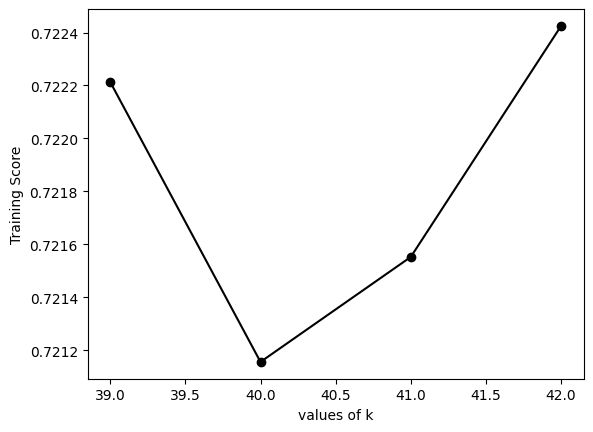

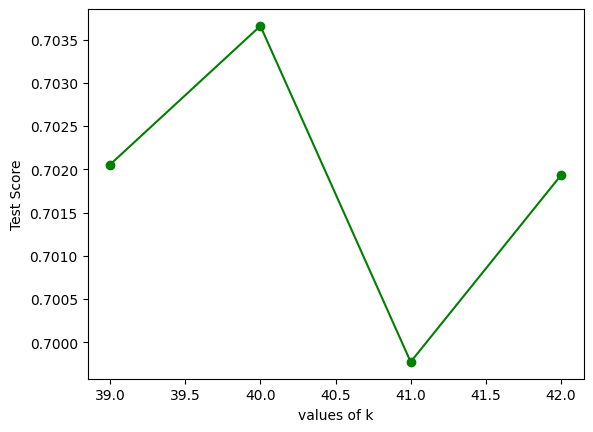

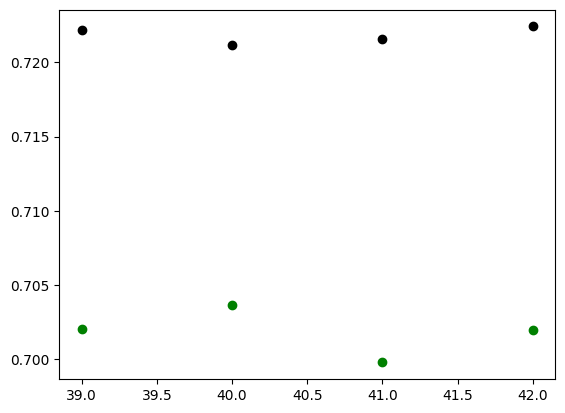

In [16]:
# train score.
plt.plot(K, training, marker='o', color='k')
plt.xlabel('values of k')
plt.ylabel('Training Score')
plt.show()

# Test score.

plt.plot(K, test, marker='o', color='g')
plt.xlabel('values of k')
plt.ylabel('Test Score')
plt.show()

# Train score Vs. test score

plt.scatter(K, training, color='k')
plt.scatter(K, test, color='g')
plt.show()